In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sigpy as sp
from sigpy.mri import samp
import sigpy.plot as pl


In [3]:
# Declaring useful functions
def fftc_2d(_data):
    data = _data.copy()
    data = np.fft.ifftshift(data)
    data = np.fft.fft2(data, norm="ortho")
    return np.fft.fftshift(data)    

def ifftc_2d(_data):
    data = _data.copy()
    data = np.fft.ifftshift(data)
    data = np.fft.ifft2(data, norm="ortho")
    return np.fft.fftshift(data)    

def show_image(image):
    plt.figure()
    plt.imshow(np.abs(image), cmap='gray')
    plt.show()

def show_kspace(kspace):
    plt.figure()
    plt.imshow(np.log(np.abs(kspace)), cmap='gray')
    plt.show()


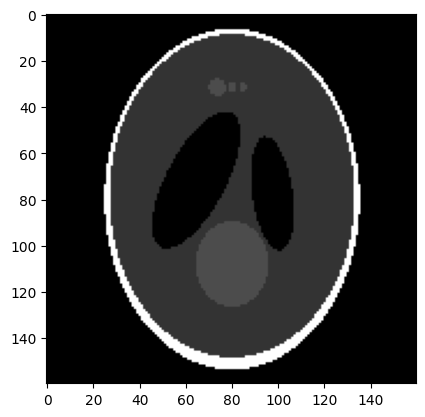

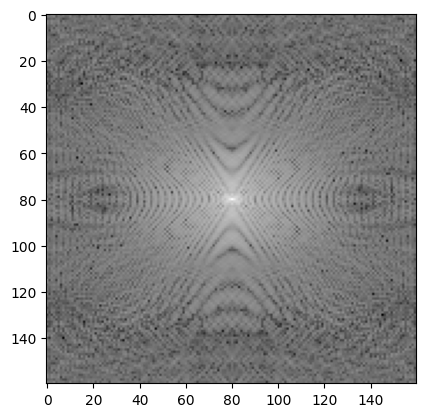

In [4]:

# create shepp-logan image and k-space
image_shape = (160, 160)
shepp_image = sp.shepp_logan(image_shape)
show_image(shepp_image)
shepp_kspace = fftc_2d(shepp_image)
show_kspace(shepp_kspace)


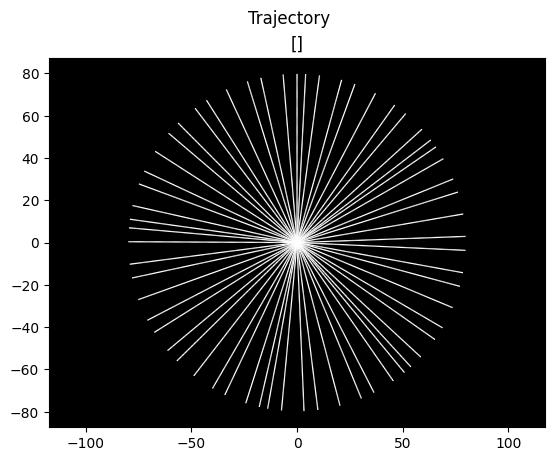

In [5]:

# sample as radial style
spoke_num, sample_num = 60, 160
coord_shepp = samp.radial([spoke_num, sample_num, 2], image_shape)
pl.ScatterPlot(coord_shepp, title='Trajectory')


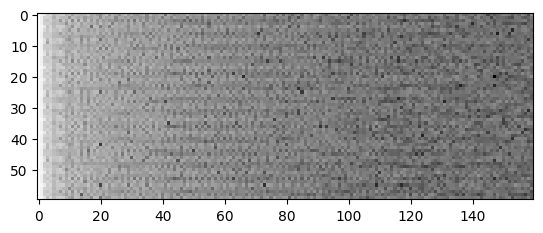

In [6]:
# if no offset to the coord, no image can be reconstructed
# BUT the k-space is very strange (the data in middle column shall have the largest magitude)
coord_offset = 80 # Half of the dimension of my image (160x160)
kspace_nu = sp.interpolate(shepp_kspace, coord_shepp + coord_offset)
show_kspace(kspace_nu)

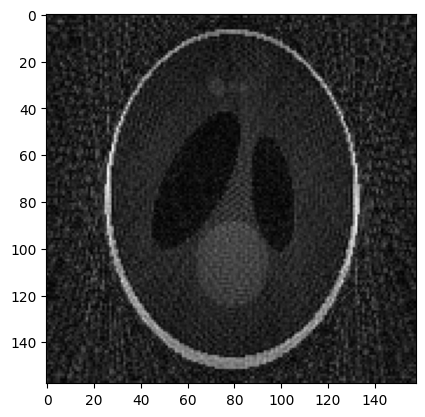

In [8]:
# Reconstruct the image from radial sampling in k-space using the Fast Fourier Transform
dcf_nu = (coord_shepp[..., 0]**2 + coord_shepp[..., 1]**2)**0.5
image_nu = sp.nufft_adjoint(kspace_nu * dcf_nu, coord_shepp) # Adjoint non-uniform Fast Fourier Transform.
show_image(image_nu)